In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from env import host, user, password

In [2]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [3]:
df_employees = pd.read_sql('select * from employees limit 5 offset 50', url)

## 1.
Load the `mpg` dataset.

> Read the documentation for it, and use the data to answer these questions:

In [4]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [5]:
df_mpg = data('mpg')
df_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


On average, which `manufacturer` has the best miles per gallon?

In [6]:
df_mpg = df_mpg.assign(avg_mpg = df_mpg[['cty', 'hwy']].mean(axis=1))

In [7]:
manufacturer = df_mpg.groupby(by='manufacturer')

In [8]:
manufacturer_avg_mpg = df_mpg[['manufacturer', 'avg_mpg']].groupby(
    by='manufacturer').mean()

manufac_best_mpg = manufacturer_avg_mpg.nlargest(1, columns='avg_mpg')
manufac_best_mpg

,avg_mpg
manufacturer,
honda,28.5


How many different `manufacturer`s are there?

In [9]:
num_of_manufacturers = df_mpg.manufacturer.nunique()
num_of_manufacturers

15

How many different `models` are there?

In [10]:
num_of_models = df_mpg.model.nunique()
num_of_models

38

Do `automatic` or `manual` cars have better miles per gallon?

In [11]:
df_mpg['trans'] = df_mpg['trans'].str.replace('\(.*\)', '')

In [12]:
df_mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize,22.0


In [13]:
trans_avg_mpg = df_mpg[['trans', 'avg_mpg']].groupby(by='trans').mean()
trans_avg_mpg

,avg_mpg
trans,
auto,19.130573
manual,22.227273


## 2.
Joining and Merging

> Copy the `users` and `roles` dataframes from the examples above.

In [14]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

> What do you think a right join would look like? 

In [15]:
users.merge(roles, how='right')

,id,name,role_id
0,1,admin,NaN
1,2,author,NaN
2,3,reviewer,NaN
3,4,commenter,NaN


> An outer join?

In [16]:
pd.merge(users, roles, how='outer')

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN
6,1,admin,NaN
7,2,author,NaN
8,3,reviewer,NaN
9,4,commenter,NaN


> What happens if you drop the foreign keys from the dataframes and try to merge them?

In [17]:
del users['id'], roles['id']

In [18]:
pd.merge(users, roles)

,name,role_id


## 3.
Getting data from SQL databases

Create a function named `get_db_url`. It should accept a `username`, `hostname`, `password`, and `database` name and return a `url` formatted like in the examples in this lesson.

In [28]:
def get_db_url(username, hostname, pswd, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

Use your function to obtain a connection to the employees database.

In [29]:
df_employees = pd.read_sql('select * from employees;',
                          get_db_url(host, user, password, database='employees'))

Once you have successfully run a query:
> Intentionally make a typo in the database `url`. What kind of error message do you see?

In [30]:
df_employees_url_error = pd.read_sql('select * from employees;',
                                     get_db_url(host, user, password, database='employees'))

Intentionally make an error in your SQL query. What does the error message look like?

In [31]:
# df_sql_query_error = pd.read_sql("Sselect * from employees;",
#                                 get_db_url(host, user, password, database='employees'))

Read the employees and titles tables into two separate dataframes

In [32]:
df_employees = pd.read_sql_table('employees',
                           get_db_url(host, user, password, database='employees'))

df_titles = pd.read_sql_table('titles',
                           get_db_url(host, user, password, database='employees'))

In [36]:
df_employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [37]:
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   emp_no      300024 non-null  int64         
 1   birth_date  300024 non-null  datetime64[ns]
 2   first_name  300024 non-null  object        
 3   last_name   300024 non-null  object        
 4   gender      300024 non-null  object        
 5   hire_date   300024 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 13.7+ MB


In [38]:
df_titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT


In [39]:
df_titles['title'].value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

Visualize the number of employees with each title.

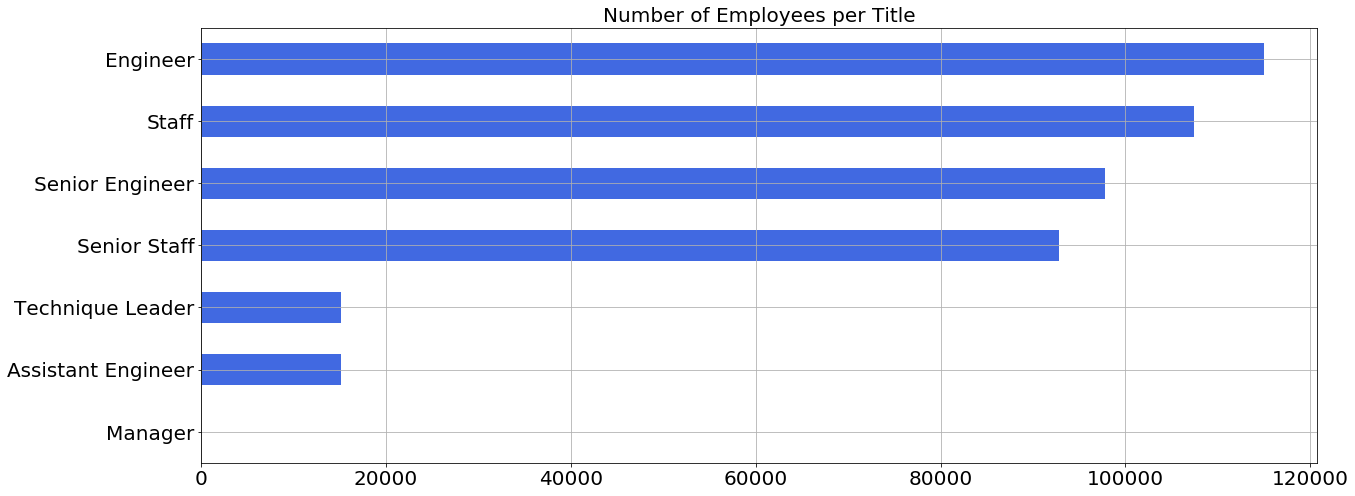

In [40]:
emps_per_titles = df_titles.groupby(by='title').emp_no.count().sort_values()


plt.figure(figsize=(20, 8))

emps_per_titles.plot.barh(color='Royalblue')

plt.title('Number of Employees per Title', fontsize=20)
plt.ylabel(None)
plt.tick_params(labelsize=20)

plt.grid(1000);

In [41]:
df_emp_titles = pd.merge(df_employees, df_titles)

In [44]:
df_current_emp_titles = df_emp_titles[df_emp_titles.to_date.isin(['NaT'])]

# num_cur_emp_titles = df_current_emp_titles.title.value_counts(ascending=True)
# print(num_cur_emp_titles)

num_cur_emp_titles = df_current_emp_titles.title.value_counts(
    normalize=True, ascending=True) # normalized

Manager                   9
Assistant Engineer     3588
Technique Leader      12055
Staff                 25526
Engineer              30983
Senior Staff          82024
Senior Engineer       85939
Name: title, dtype: int64


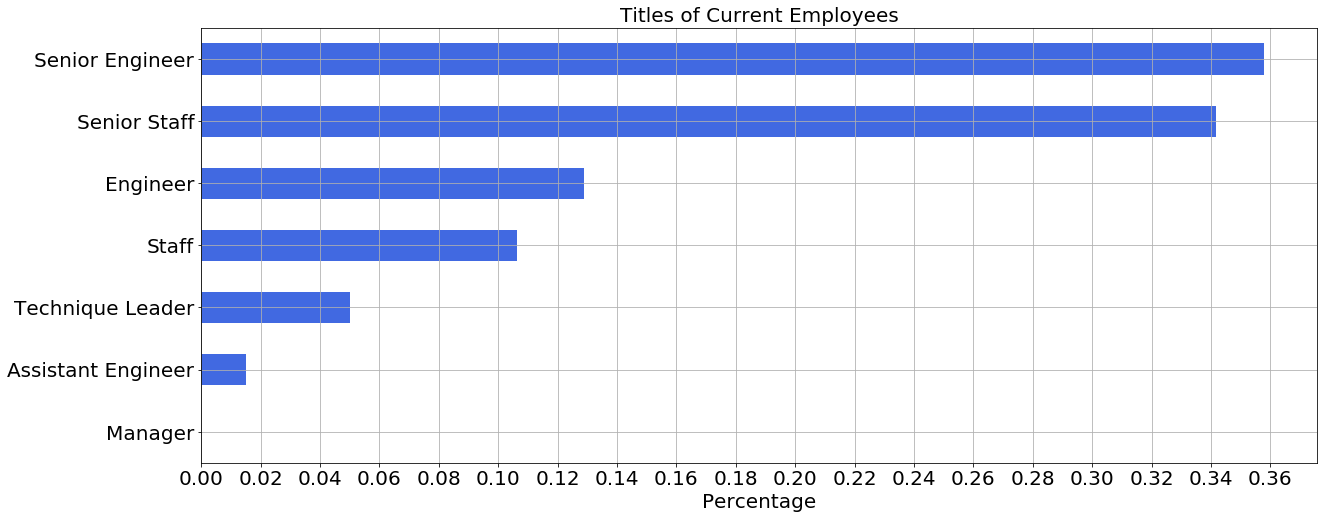

In [43]:
plt.figure(figsize=(20, 8))

num_cur_emp_titles.plot.barh(color='Royalblue')


plt.title('Titles of Current Employees', fontsize=20)

plt.xlabel('Percentage', fontsize=20)
plt.xticks(np.arange(0, .38, .02))
plt.tick_params(labelsize=20)

plt.grid(1000);

Join the employees and titles dataframes together.

In [26]:
df_emp_titles = pd.merge(df_employees, df_titles)

df_emp_titles.head()

NameError: name 'df_employees' is not defined

Visualize how frequently employees change titles.

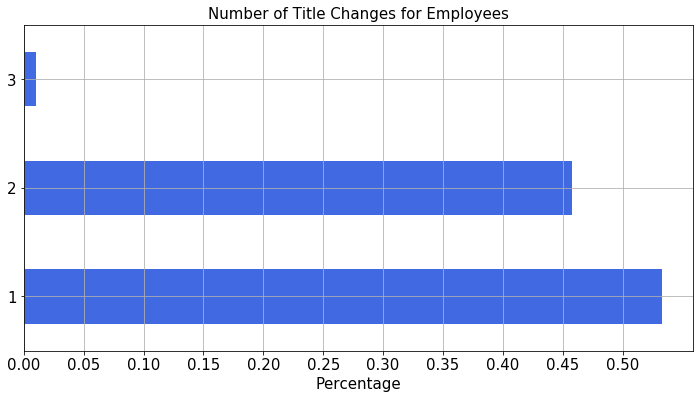

In [60]:
emp_title_change_freq = df_emp_titles.groupby(by='emp_no').title.count().value_counts(normalize=True)
plt.figure(figsize=(12, 6))
emp_title_change_freq.plot.barh(color='Royalblue')
plt.title('Number of Title Changes for Employees',
          fontsize=15)
plt.xlabel('Percentage', fontsize=15)
plt.xticks(np.arange(0, .55, .05))
plt.tick_params(labelsize=15)

plt.grid();

For each title, find the hire date of the employee that was hired most recently with that title.

In [34]:
recent_hire_per_title = df_current_emp_titles.loc[df_current_emp_titles.groupby(
    by='title')['hire_date'].idxmax()].sort_values(by='hire_date')

# filtered results to find the most recent hire date for each title where the employee
# still works for the company.

recent_hire_per_title

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
148155,110420,1963-07-27,Oscar,Ghazalie,M,1992-02-05,Manager,1996-08-30,NaT
357298,441722,1958-12-01,Gonzalo,Aamodt,F,1999-12-15,Technique Leader,1999-12-15,NaT
212605,243702,1961-10-04,Munehiro,Luke,F,1999-12-24,Assistant Engineer,2000-01-07,NaT
145474,108201,1955-04-14,Mariangiola,Boreale,M,2000-01-01,Senior Engineer,2000-01-01,NaT
55137,47291,1960-09-09,Ulf,Flexer,M,2000-01-12,Staff,2000-01-26,NaT
182100,222965,1959-08-07,Volkmar,Perko,F,2000-01-13,Senior Staff,2000-01-29,NaT
337630,428377,1957-05-09,Yucai,Gerlach,M,2000-01-23,Engineer,2000-01-23,NaT


Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [35]:
df_num_titles = pd.read_sql("""
select dept_name, title
from titles
join dept_emp using(emp_no)
join departments using(dept_no);
""", get_db_url(host, user, password, database='employees'))

In [36]:
pd.crosstab(df_num_titles.dept_name, df_num_titles.title)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


## 4.
Use your `get_db_url` function to help you explore the data from the `chipotle` database. Use the data to answer the following questions:

In [6]:
df_chipotle = pd.read_sql("""
select *
from orders;""", get_db_url(host, user, password, database='chipotle'))

In [7]:
df_chipotle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [8]:
df_chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


What is the total price for each order?

In [9]:
df_chipotle.item_price = df_chipotle.item_price.str.replace('$', '').astype('float')
df_chipotle['total_price'] = round(df_chipotle.quantity * df_chipotle.item_price, 2)

! [Chipotle Menu](https://www.google.com/url?sa=i&url=https%3A%2F%2Frestaurantguru.com%2FChipotle-Arvada%2Fmenu&psig=AOvVaw2oEywvUvCabtHnrTUpyJ-3&ust=1597606396793000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCKj-1eD5nesCFQAAAAAdAAAAABAm)

In [42]:
df_chipotle.item_name = df_chipotle.item_name.str.replace('-',' ')

In [43]:
df_chipotle.item_name = df_chipotle.item_name.str.replace('Soft Drink','Soda')

In [44]:
df_chipotle.item_name = df_chipotle.item_name.str.replace('Salad Bowl', 'Salad')

In [45]:
df_chipotle.item_name = df_chipotle.item_name.str.replace('Mild ', '')

In [46]:
df_chipotle[['order_id','total_price']].head()

,order_id,total_price
0,1,2.39
1,1,3.39
2,1,3.39
3,1,2.39
4,2,33.96


In [50]:
df_chipotle.groupby(by=['item_name'])[['total_price']].sum()

,total_price
item_name,
6 Pack Soda,369.93
Barbacoa Bowl,672.36
Barbacoa Burrito,894.75
Barbacoa Crispy Tacos,138.71
Barbacoa Salad,106.40
Barbacoa Soft Tacos,250.46
Bottled Water,649.18
Bowl,74.00
Burrito,44.40


What are the most popular 3 items?

In [25]:
top_3_items = df_chipotle['item_name'].value_counts().nlargest(3)
print(top_3_items)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Name: item_name, dtype: int64


Which item has produced the most revenue?

In [18]:
revenue_per_item = df_chipotle.groupby(by='item_name')['total_price'].sum()
most_popular_item = revenue_per_item.idxmax()  # returns a string
most_popular_item_revenue = revenue_per_item.max()

print(f"Item that produced the most revenue: {most_popular_item} - ${round(most_popular_item_revenue, 2)}")

Item that produced the most revenue: Chicken Bowl - $8044.63
